# About Data Set :

Fifa is one of the most played console games in the world. Fifa 21 is a series of this. Fifa 21 is a soccer game.FIFA 21 is a football simulation video game published by Electronic Arts as part of the FIFA series. It is the 28th installment in the FIFA series, and was released on 9 October 2020 for Microsoft Windows, Nintendo Switch, PlayStation 4 and Xbox One. Enhanced versions for the PlayStation 5 and Xbox Series X and Series S were released on 3 December 2020, in addition to a version for Stadia. I performed Exploratory Data Analysis using the Fifa 21 data set. Later, I made visualizations using matplotlib & seaborn libraries.

## Objective :
Highlight the top players for their outstanding performances over a discrete season.

### Importing libraries

In [1]:
import pandas as pd   
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import boxcox

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler

### Load and Check Data

In [2]:
# to import a file into a pandas DataFrame
data = pd.read_csv('fifa21_male2.csv')

In [3]:
# to display the dataframe
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [4]:
#Viweing the columns available in our Dataset
list(data.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [5]:
# standardizing the column names for it's practicality
# standardized column names will be meaninfull strings, lower cased and with '_' instead of 'spaces'
data.columns = [data.columns[i].lower().replace(' ','_') for i in range(len(data.columns))]

In [6]:
# getting the list of columns
list(data.columns) 

['id',
 'name',
 'age',
 'ova',
 'nationality',
 'club',
 'bov',
 'bp',
 'position',
 'player_photo',
 'club_logo',
 'flag_photo',
 'pot',
 'team_&_contract',
 'height',
 'weight',
 'foot',
 'growth',
 'joined',
 'loan_date_end',
 'value',
 'wage',
 'release_clause',
 'contract',
 'attacking',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'skill',
 'dribbling',
 'curve',
 'fk_accuracy',
 'long_passing',
 'ball_control',
 'movement',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'power',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'mentality',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'composure',
 'defending',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'goalkeeping',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes',
 'total_stats',
 'base_stats',
 'w/f',
 'sm',
 'a/w',
 'd/w',
 'ir',
 'pac',
 'sho',
 'pas',
 'dri',
 'def',
 'phy',
 

## Exploratory Data Analysis

In [7]:
#Checking for the Number Unique Features in Each Column.
list(data.nunique())  

[17125,
 16176,
 30,
 50,
 167,
 917,
 50,
 15,
 622,
 17125,
 918,
 167,
 47,
 9822,
 21,
 57,
 2,
 28,
 1953,
 38,
 216,
 142,
 1200,
 434,
 366,
 89,
 93,
 89,
 86,
 87,
 390,
 91,
 91,
 90,
 84,
 91,
 329,
 86,
 85,
 81,
 70,
 80,
 288,
 83,
 73,
 87,
 78,
 91,
 351,
 88,
 90,
 95,
 85,
 87,
 84,
 249,
 92,
 87,
 85,
 267,
 72,
 73,
 82,
 82,
 76,
 1401,
 249,
 5,
 5,
 3,
 3,
 5,
 72,
 77,
 68,
 67,
 79,
 67,
 593,
 278,
 278,
 278,
 178,
 167,
 167,
 167,
 178,
 321,
 321,
 321,
 309,
 269,
 269,
 269,
 309,
 279,
 312,
 312,
 312,
 279,
 275,
 328,
 328,
 328,
 275,
 169,
 1]

### Top 5 Fastest Players of FIFA 2021

In [8]:

player = data[["acceleration","name","bp",'nationality','sprint_speed']].nlargest(5, ['acceleration']).set_index('name')
player

,acceleration,bp,nationality,sprint_speed
name,,,,
Adama Traoré,97,RM,Spain,96
B. Ronhaar,96,CF,Netherlands,91
R. Sterling,96,LW,England,90
K. Mbappé,96,ST,France,96
D. James,96,RM,Wales,95


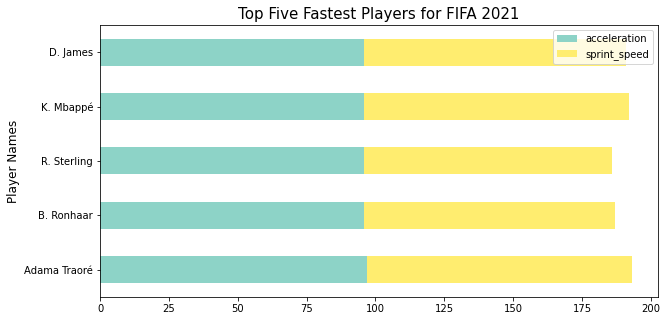

In [9]:
from matplotlib import cm 
plot1 = player.plot(kind = 'barh', stacked=True,width=0.5,colormap = cm.get_cmap('Set3'),figsize = (10,5))
plt.title('Top Five Fastest Players for FIFA 2021',fontsize = 15)
plt.ylabel('Player Names',fontsize = 12)
plt.savefig('top_5.jpg')
plt.show()

### Which foot does the footballers in fifa 21 use more?

In [10]:
data["foot"].value_counts() # gives unique values total count from the 'foot' column

Right    12906
Left      4219
Name: foot, dtype: int64

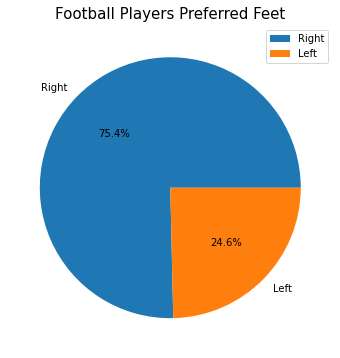

In [11]:
plt.subplots(figsize=(6,6)) #This will set the Width and Height of our visuals
plt.pie(data["foot"].value_counts(), labels=["Right","Left"],autopct="%1.1f%%") 
plt.title('Football Players Preferred Feet',fontsize = 15)
plt.legend()
plt.savefig('preferre_foot.jpg')
plt.show()

#### Observations : 
 - It seems most players like prefer to take the shot with their right foot.
 - 75.4% of the players prefer right foot and 24.6% players prefer left foot.

### Top 3 Footballers with the Highest Wage & Nationality of this footballers

In [12]:
# checking 'wage' column values
data['wage'].sample(3)

14337    €500
15548    €800
5902     €15K
Name: wage, dtype: object

#### We must omit the Euro symbol and multiply the number in the object by either 1000 for 'K' or 1000000 for 'M'

In [13]:
# changing 'wage' column values
def format_money1(column):
    values = []
    for value in data[column]:
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

# Calling format_money function
data['wage'] =  format_money1('wage')

In [14]:
data['wage'].sample(3)

7441    46000.0
2675     6000.0
2672    51000.0
Name: wage, dtype: float64

Text(0, 0.5, 'Player names')

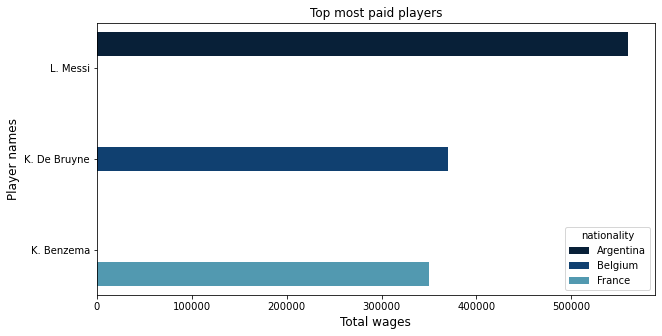

In [15]:
#Players with the highest wages
plt.figure(figsize=(10,5))  #This will set the Width and Height of our visuals
player = data.nlargest(3, ['wage']).set_index('name') 
sns.barplot(player['wage'], player.index, ci = None, hue = player['nationality'],palette="ocean")
plt.title("Top most paid players")
plt.xlabel('Total wages',fontsize = 12)
plt.ylabel('Player names',fontsize = 12)

### Dropping columns in our Dataset with Pandas

DROPPED Column List -  

 'Position',
 'Joined', 
 'GK Diving', 
 'GK Handling', 
 'GK Kicking', 
 'GK Positioning', 
 'GK Reflexes', 
 'Hits', 
 'LS', 
 'ST', 
 'RS', 
 'LW', 
 'LF', 
 'CF', 
 'RF', 
 'RW', 
 'LAM', 
 'CAM', 
 'RAM', 
 'LM', 
 'LCM', 
 'CM', 
 'RCM', 
 'RM', 
 'LWB', 
 'LDM', 
 'CDM', 
 'RDM', 
 'RWB', 
 'LB', 
 'LCB', 
 'CB', 
 'RCB', 
 'RB', 
 'Base Stats',
 'Club', 
 'BOV',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'Team & Contract',
 'Weight', 
 'Loan Date End', 
 'Release Clause', 
 'Contract', 
 'Attacking', - 
 'Crossing', 
 'Finishing', 
 'Heading Accuracy', 
 'Volleys', 
 'Curve', 
 'FK Accuracy', 
 'Ball Control', 
 'Movement',
 'Reactions', 
 'Balance', 
 'Jumping', 
 'Stamina', 
 'Mentality',
 'Aggression',
 'Interceptions', - 
 'Composure',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'GK',
 'Gender'
 
 - We have dropped **76** non-performance columns from dataset based on affinity with our target variable 'OVA' based on explanations from this website: https://fifauteam.com/fifa-21-attributes-guide/

In [16]:
# Data frame with selected columns
fifa = data[['name','value','wage','short_passing','dribbling','long_passing','acceleration',
            'sprint_speed','shot_power','long_shots','positioning','vision','penalties','ova','defending',
             'goalkeeping','phy','volleys','crossing','finishing','fk_accuracy','curve',"bp"]]

In [17]:
# to display the dataframe
fifa.head()

,name,value,wage,short_passing,dribbling,long_passing,acceleration,sprint_speed,shot_power,long_shots,...,ova,defending,goalkeeping,phy,volleys,crossing,finishing,fk_accuracy,curve,bp
0,G. Pasquale,€625K,7000.0,71,73,69,68,74,74,68,...,69,208,56,69,58.0,75,50,60,65.0,LWB
1,Luis García,€600K,7000.0,76,69,71,56,50,75,71,...,71,153,56,63,68.0,68,64,79,79.0,CM
2,J. Cole,€1.1M,15000.0,77,79,69,48,42,72,69,...,71,99,51,52,75.0,80,64,77,84.0,CAM
3,D. Yorke,€0,0.0,80,68,64,59,62,63,59,...,68,75,68,60,NaN,54,70,46,NaN,ST
4,Iniesta,€5.5M,12000.0,90,85,83,61,56,67,70,...,81,181,45,59,79.0,75,69,70,80.0,CAM


In [18]:
fifa.columns

Index(['name', 'value', 'wage', 'short_passing', 'dribbling', 'long_passing',
       'acceleration', 'sprint_speed', 'shot_power', 'long_shots',
       'positioning', 'vision', 'penalties', 'ova', 'defending', 'goalkeeping',
       'phy', 'volleys', 'crossing', 'finishing', 'fk_accuracy', 'curve',
       'bp'],
      dtype='object')

### Check for Missing Value In Dataset

In [19]:
#Checking for columns with missing values
fifa.isna().sum()

name              0
value             0
wage              0
short_passing     0
dribbling         0
long_passing      0
acceleration      0
sprint_speed      0
shot_power        0
long_shots        0
positioning       7
vision           58
penalties         0
ova               0
defending         0
goalkeeping       0
phy               0
volleys          58
crossing          0
finishing         0
fk_accuracy       0
curve            58
bp                0
dtype: int64

In [20]:
# dropping nan values in 'positioning' column
fifa = fifa.dropna(subset = ['positioning'])

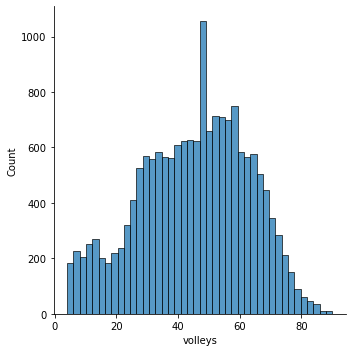

In [21]:
# Dealing with nan values in 'volleys' column

# Checking for skewnwss of data to determine imputation method
sns.displot(fifa.volleys)

In [22]:
# Replacing nan values with mean value for 'volleys' column
fifa["volleys"][fifa.volleys.isna()] = fifa['volleys'].mean()

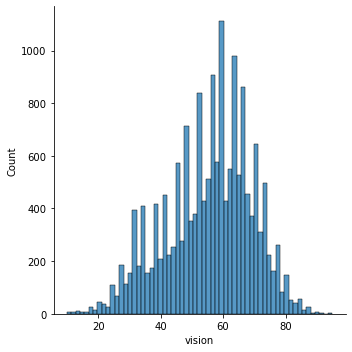

In [23]:
# Dealing with nan values in 'vision' column

# Checking for skewnwss of data
sns.displot(fifa.vision)

In [24]:
# checking mean and median value for 'vision' column to fill the nan values.
print("Mean value of 'vision' is ",fifa['vision'].mean())
print("Median value of 'vision' is ",fifa['vision'].median())

Mean value of 'vision' is  55.44360461709732
Median value of 'vision' is  57.0


In [25]:
# Replacing nan values with mean value for 'vision' column
fifa["vision"][fifa.vision.isna()] = fifa['vision'].mean()

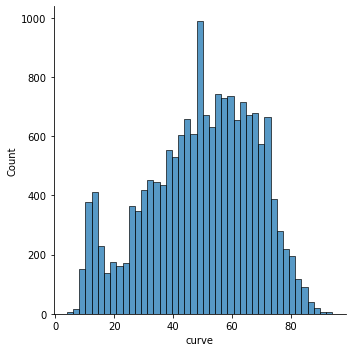

In [26]:
# Dealing with nan values in 'curve' column

# Checking for skewnwss of data
sns.displot(fifa.curve)

In [27]:
# checking mean and median value for 'curve' column to fill the nan values.
print("Mean value of 'curve' is ",fifa['curve'].mean())
print("Median value of 'curve' is ",fifa['curve'].median())

Mean value of 'curve' is  49.57467627585399
Median value of 'curve' is  51.0


In [28]:
# Replacing nan values with mean value for 'curve' column
fifa["curve"][fifa.curve.isna()] = fifa['curve'].mean()

In [29]:
fifa.isna().sum().sum()

0

### Data types in our dataset

In [30]:
#Checking for the number of Categorical and Numerical Data
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 0 to 17124
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           17118 non-null  object 
 1   value          17118 non-null  object 
 2   wage           17118 non-null  float64
 3   short_passing  17118 non-null  int64  
 4   dribbling      17118 non-null  int64  
 5   long_passing   17118 non-null  int64  
 6   acceleration   17118 non-null  int64  
 7   sprint_speed   17118 non-null  int64  
 8   shot_power     17118 non-null  int64  
 9   long_shots     17118 non-null  int64  
 10  positioning    17118 non-null  float64
 11  vision         17118 non-null  float64
 12  penalties      17118 non-null  int64  
 13  ova            17118 non-null  int64  
 14  defending      17118 non-null  int64  
 15  goalkeeping    17118 non-null  int64  
 16  phy            17118 non-null  int64  
 17  volleys        17118 non-null  float64
 18  crossi

#### Data set contains :
 - 3 categorical value columns
 - 5 floating value columns and
 - 15 numerical value columns

In [31]:
# checking column values for 'value' column
fifa['value'].head() # obj

0    €625K
1    €600K
2    €1.1M
3       €0
4    €5.5M
Name: value, dtype: object

#### We must omit the Euro symbol and multiply the number in the object by either 1000 for 'K' or 1000000 for 'M'

In [32]:
# Function to change the 'value' column values.

def format_money(column):
    values = []
    for value in fifa[column]:
        if value[-1]=='M':
            money = 1000000
            money *= float(value[1:-1])
        elif value[-1]=='K':
            money = 1000
            money *= float(value[1:-1])
        else: 
            money = 0
        values.append(money)
    return values

In [33]:
# Calling format_money function
fifa['value'] =  format_money('value')

In [34]:
# checking for formatted 'value' column values
fifa['value'].head()

0     625000.0
1     600000.0
2    1100000.0
3          0.0
4    5500000.0
Name: value, dtype: float64

In [35]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 0 to 17124
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           17118 non-null  object 
 1   value          17118 non-null  float64
 2   wage           17118 non-null  float64
 3   short_passing  17118 non-null  int64  
 4   dribbling      17118 non-null  int64  
 5   long_passing   17118 non-null  int64  
 6   acceleration   17118 non-null  int64  
 7   sprint_speed   17118 non-null  int64  
 8   shot_power     17118 non-null  int64  
 9   long_shots     17118 non-null  int64  
 10  positioning    17118 non-null  float64
 11  vision         17118 non-null  float64
 12  penalties      17118 non-null  int64  
 13  ova            17118 non-null  int64  
 14  defending      17118 non-null  int64  
 15  goalkeeping    17118 non-null  int64  
 16  phy            17118 non-null  int64  
 17  volleys        17118 non-null  float64
 18  crossi

In [36]:
# Converting float values into int for below columns

fifa['volleys']= fifa['volleys'].astype('int')
fifa['value']= fifa['value'].astype('int')
fifa['wage']= fifa['wage'].astype('int')
fifa['curve']= fifa['curve'].astype('int')
fifa['vision']= fifa['vision'].astype('int')
fifa['positioning']= fifa['positioning'].astype('int')

In [37]:
# seperating numerical columns to check for multicolinarity
num_col = fifa[fifa.select_dtypes('number').columns]

In [38]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17118 entries, 0 to 17124
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           17118 non-null  object
 1   value          17118 non-null  int32 
 2   wage           17118 non-null  int32 
 3   short_passing  17118 non-null  int64 
 4   dribbling      17118 non-null  int64 
 5   long_passing   17118 non-null  int64 
 6   acceleration   17118 non-null  int64 
 7   sprint_speed   17118 non-null  int64 
 8   shot_power     17118 non-null  int64 
 9   long_shots     17118 non-null  int64 
 10  positioning    17118 non-null  int32 
 11  vision         17118 non-null  int32 
 12  penalties      17118 non-null  int64 
 13  ova            17118 non-null  int64 
 14  defending      17118 non-null  int64 
 15  goalkeeping    17118 non-null  int64 
 16  phy            17118 non-null  int64 
 17  volleys        17118 non-null  int32 
 18  crossing       17118 non-n

In [39]:
### Checking for the Shape of Dataset in Rows and Columns
fifa.shape

(17118, 23)

- It has **17118** rows
- It has **22** columns

In [40]:
# checking correlation between the numerical columns
a = round(num_col.corr(),2)

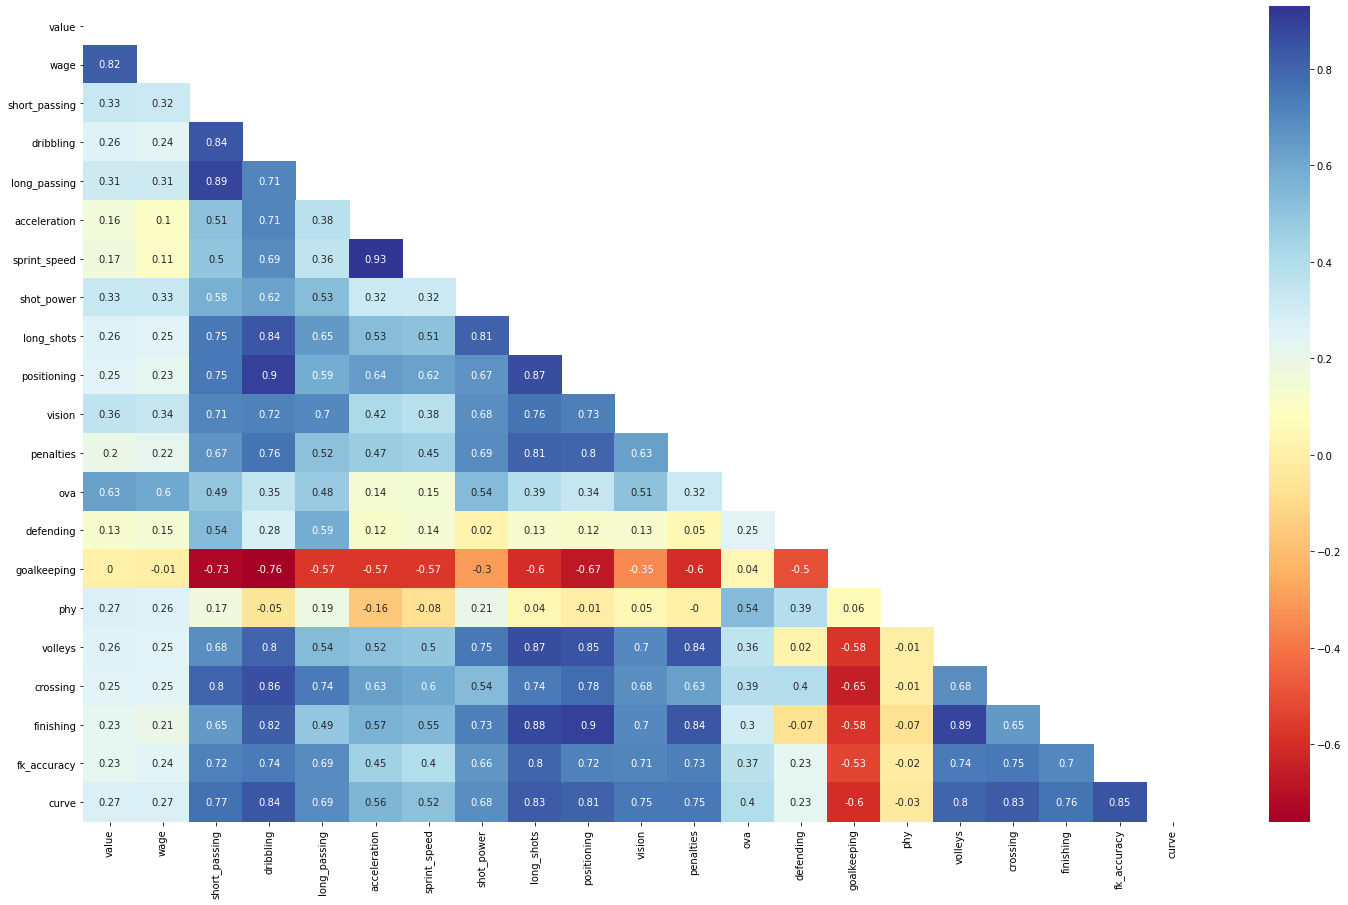

In [41]:
# visual view of correlation on nemerical columns
plt.figure(figsize=(25,15))
mask = np.zeros_like(a, dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(a, annot=True, mask=mask,cmap='RdYlBu')
plt.show()

In [42]:
### Observation: Goalkeeping appears to have a moderate or significant with all variables, except the Target Variable (OVA).

### Statistical Analysis of our Dataset

 - Giving A Statistical Analysis of our Dataset

In [43]:
### Descriptive statistics & Interquartile range (necessary for removing outliers later)

In [44]:
summary = fifa.describe().T
display(summary)

def rounding(x):
    return round(x, 2)

summary['iqr'] = summary['75%']-summary['25%']
summary = summary.apply(round) # lambda x: round(x, 2) # round, ndigits=2 # rounding
summary

,count,mean,std,min,25%,50%,75%,max
value,17118.0,2.568427e+06,5.373470e+06,0.0,375000.0,800000.0,2400000.0,105500000.0
wage,17118.0,1.044123e+04,2.119476e+04,0.0,1000.0,3000.0,11000.0,560000.0
short_passing,17118.0,6.051180e+01,1.395219e+01,7.0,56.0,63.0,69.0,94.0
dribbling,17118.0,5.785162e+01,1.804144e+01,5.0,53.0,63.0,70.0,96.0
long_passing,17118.0,5.432422e+01,1.485403e+01,9.0,45.0,57.0,65.0,93.0
acceleration,17118.0,6.544684e+01,1.465770e+01,12.0,58.0,68.0,75.0,97.0
sprint_speed,17118.0,6.544351e+01,1.443812e+01,11.0,59.0,68.0,75.0,96.0
shot_power,17118.0,5.971521e+01,1.341013e+01,12.0,50.0,61.0,70.0,95.0
long_shots,17118.0,4.913763e+01,1.904246e+01,4.0,35.0,53.0,64.0,94.0
positioning,17118.0,5.237277e+01,1.909443e+01,2.0,43.0,57.0,66.0,96.0


,count,mean,std,min,25%,50%,75%,max,iqr
value,17118.0,2568427.0,5373470.0,0.0,375000.0,800000.0,2400000.0,105500000.0,2025000.0
wage,17118.0,10441.0,21195.0,0.0,1000.0,3000.0,11000.0,560000.0,10000.0
short_passing,17118.0,61.0,14.0,7.0,56.0,63.0,69.0,94.0,13.0
dribbling,17118.0,58.0,18.0,5.0,53.0,63.0,70.0,96.0,17.0
long_passing,17118.0,54.0,15.0,9.0,45.0,57.0,65.0,93.0,20.0
acceleration,17118.0,65.0,15.0,12.0,58.0,68.0,75.0,97.0,17.0
sprint_speed,17118.0,65.0,14.0,11.0,59.0,68.0,75.0,96.0,16.0
shot_power,17118.0,60.0,13.0,12.0,50.0,61.0,70.0,95.0,20.0
long_shots,17118.0,49.0,19.0,4.0,35.0,53.0,64.0,94.0,29.0
positioning,17118.0,52.0,19.0,2.0,43.0,57.0,66.0,96.0,23.0


In [45]:
## Distribution plots of the selected numerical variables

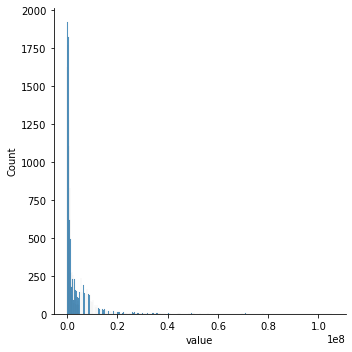

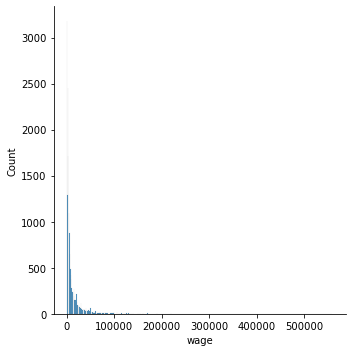

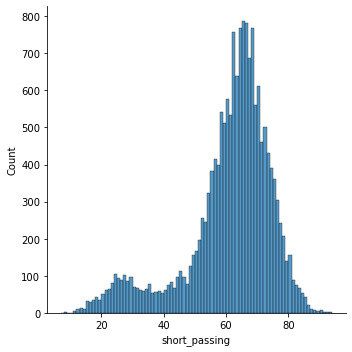

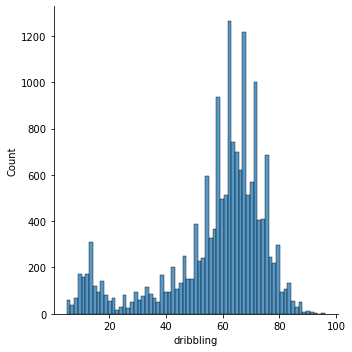

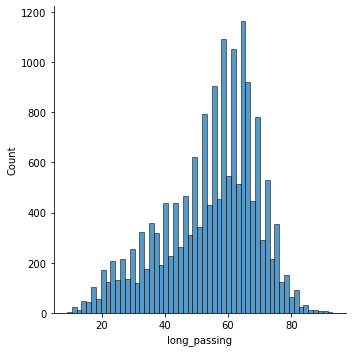

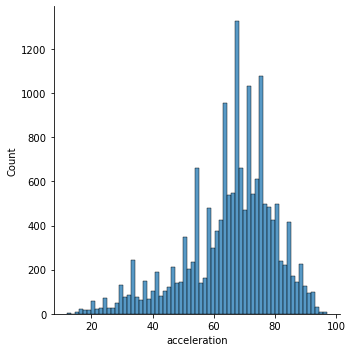

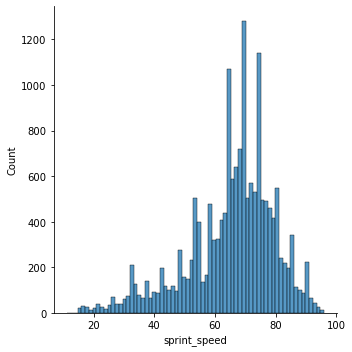

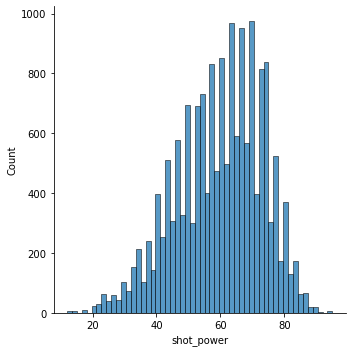

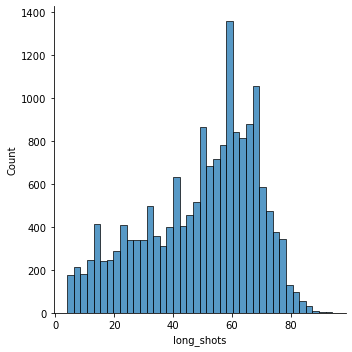

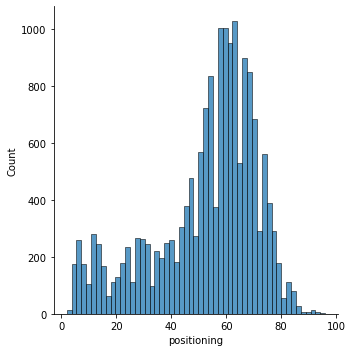

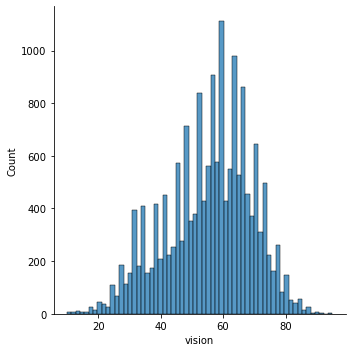

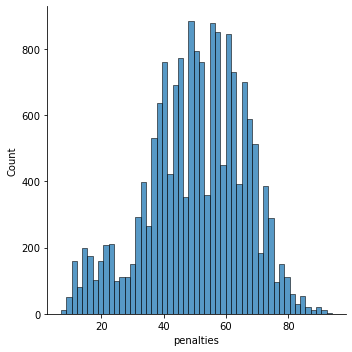

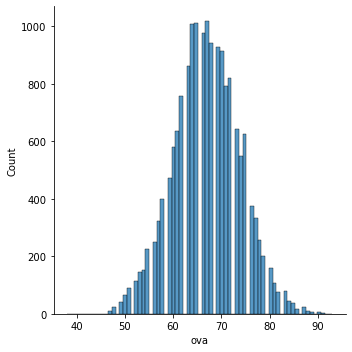

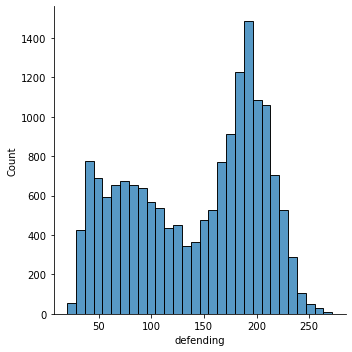

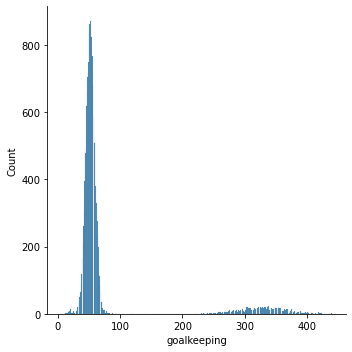

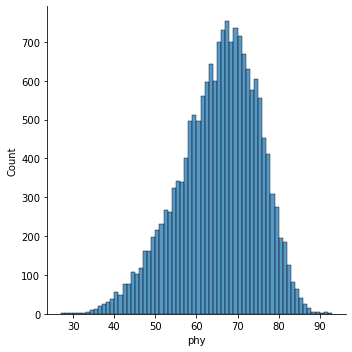

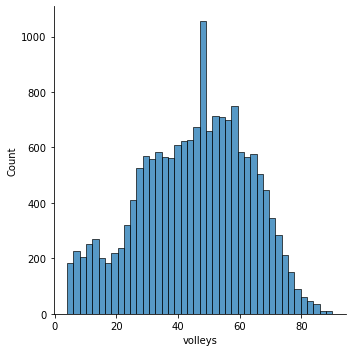

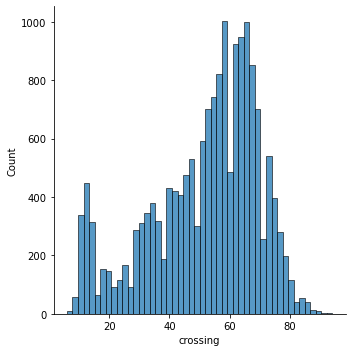

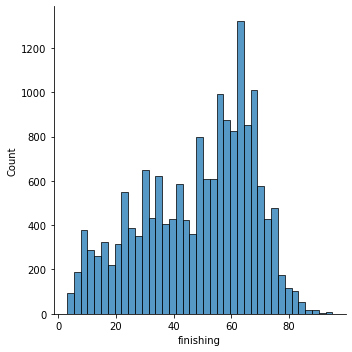

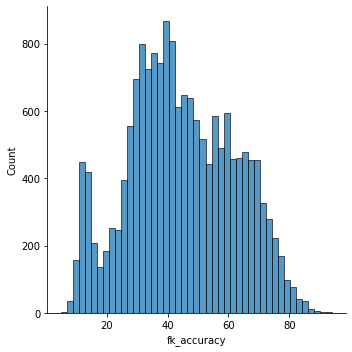

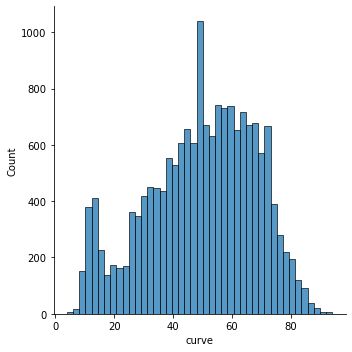

In [46]:
for column in num_col.columns:
    sns.displot(num_col[column])
    plt.show()

 - The variables **defending** displays a **bimodal shape** with **two peaks**, whereby the data is skewed to both sides.
 - With the exception of value, wage asnd fk_accuracy, which are skewed to the left, the rest are normally distributed or mildly skewed to the right.

### Let's find the top 10 countries with the most players in FIFA.

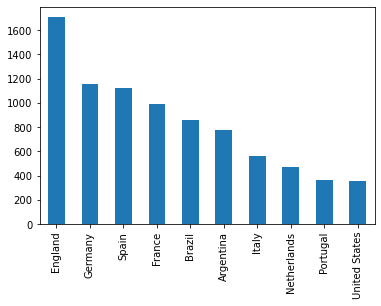

In [47]:
national = data['nationality'].value_counts()[:10]
national.plot.bar()
plt.show()

### Best Defender in FIFA 2021

In [48]:
defender = data[["defending","name","bp",'age','nationality']].nlargest(10, ['defending']).set_index('name')
defender

,defending,bp,age,nationality
name,,,,
G. Chiellini,272,CB,35,Italy
V. van Dijk,272,CB,28,Netherlands
P. Lahm,268,RWB,32,Germany
K. Koulibaly,267,CB,29,Senegal
A. Laporte,266,CB,26,France
M. Hummels,264,CB,31,Germany
N. Kanté,264,CDM,29,France
Sergio Ramos,263,CB,34,Spain
A. Barzagli,262,CB,37,Italy


#### Observation : 
 - The top 3 Defenders are **G. Chiellini, V. van Dijk, and P. Lahm**.

### Best Players with LongPasses in FIFA 2021

In [49]:
longpass = data[["long_passing","name","bp",'age','nationality']].nlargest(10,['long_passing']).set_index('name')
longpass

,long_passing,bp,age,nationality
name,,,,
T. Kroos,93,CM,30,Germany
K. De Bruyne,93,CAM,29,Belgium
Xabi Alonso,91,CM,34,Spain
L. Messi,91,RW,33,Argentina
P. Pogba,91,CM,27,France
P. Scholes,90,CAM,37,England
Xavi,90,CAM,34,Spain
Parejo,90,CM,31,Spain
L. Modrić,89,CM,34,Croatia


#### Observation : 
 - The top 3 players with the best long passing skills are **T.Kroos, K. De Bruyne, and Xabi Alonso**.

### Best Player's with ShortPasses in FIFA 2021

In [50]:
shortpass = data[["short_passing", "name","bp","age", "nationality"]].nlargest(10,['short_passing']).set_index('name')
shortpass

,short_passing,bp,age,nationality
name,,,,
K. De Bruyne,94,CAM,29,Belgium
Xavi,93,CAM,34,Spain
T. Kroos,93,CM,30,Germany
David Silva,92,CAM,34,Spain
Parejo,92,CM,31,Spain
B. Schneider,91,CF,34,Germany
L. Messi,91,RW,33,Argentina
L. Modrić,91,CM,34,Croatia
Iniesta,90,CAM,36,Spain


##### Observation :
The top 3 players with the best short passing skills are K. De Bruyne, Xavi, and T.Kroos. K. De Bruyne and T.Kroos are also amongst the top players with the best long passing skills (assuming both skills are of equal value). This means both players have the best overall passing skills. L.Messi comes in third overall.

In [51]:
overall = data[["name","long_passing", "short_passing", "bp","nationality"]].nlargest(10,['long_passing', 'short_passing']).set_index('name')

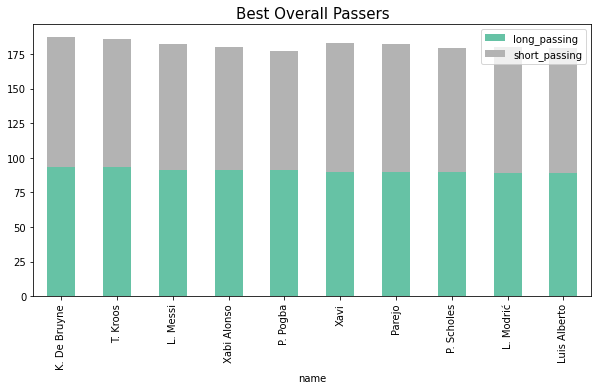

In [52]:
plot1 = overall.plot(kind = 'bar', stacked=True,width=0.5,colormap = cm.get_cmap('Set2'),figsize = (10,5))
plt.title('Best Overall Passers', fontsize = 15)
plt.savefig('top_5.jpg')
plt.show()

### Strongest Players in FIFA 2021

In [53]:
strongplayers= data[["strength","name","bp","nationality"]].nlargest(10,['strength']).set_index('name')
strongplayers

,strength,bp,nationality
name,,,
A. Akinfenwa,97,ST,England
O. Onyewu,96,CB,United States
D. Dike,96,ST,United States
J. Stam,95,CB,Netherlands
R. Lukaku,95,ST,Belgium
A. Vukotić,95,CB,Serbia
J. Dawa Tchakonte,95,CB,Cameroon
A. Méndez,95,CB,Uruguay
J. Koller,94,ST,Czech Republic


#### Observation:
 - A. Akifenwa, O.Onyewu and D.Dike are the three strongest players. This does not take into account shot_power, which is a function of both strength and accuracy.

### Data Preprocessing

In [54]:
### Variable Encoding using GetDummies

 #### Note 1: 
 - The outliers in the model were retained due to the nature of the variables themselves -- the extreme values are associated with a select number of extremely good players with high earnings and correspondingly valuable skill stats.
 
#### Note 1: 
 - The boxcox transformation was not performed on the bimodal variables as it would affect the nature of the analysis  
 
#### See links: 
 - (a) https://stats.stackexchange.com/questions/209241/what-transformation-should-i-use-for-a-bimodal-distribution
 - (b) https://stats.stackexchange.com/questions/124059/how-to-transform-continuous-data-with-extreme-bimodal-distribution

### X-y split

In [55]:
# separating object column for encoding
X_cat= fifa[["bp"]]
X_cat

,bp
0,LWB
1,CM
2,CAM
3,ST
4,CAM
...,...
17120,CB
17121,CAM
17122,RB
17123,RB


In [56]:
# applaying one hot encoding to object column
X_cat= pd.get_dummies(X_cat, drop_first=True)
X_cat

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,bp_RM,bp_RW,bp_RWB,bp_ST
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,1,0,0,0,0,0,0,0,0,0,0,0,0,0
17121,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17122,0,0,0,0,0,0,0,0,0,1,0,0,0,0
17123,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [57]:
# defining the X value
X = fifa.drop(['ova'],axis=1)
X.head()

,name,value,wage,short_passing,dribbling,long_passing,acceleration,sprint_speed,shot_power,long_shots,...,penalties,defending,goalkeeping,phy,volleys,crossing,finishing,fk_accuracy,curve,bp
0,G. Pasquale,625000,7000,71,73,69,68,74,74,68,...,50,208,56,69,58,75,50,60,65,LWB
1,Luis García,600000,7000,76,69,71,56,50,75,71,...,75,153,56,63,68,68,64,79,79,CM
2,J. Cole,1100000,15000,77,79,69,48,42,72,69,...,66,99,51,52,75,80,64,77,84,CAM
3,D. Yorke,0,0,80,68,64,59,62,63,59,...,70,75,68,60,45,54,70,46,49,ST
4,Iniesta,5500000,12000,90,85,83,61,56,67,70,...,71,181,45,59,79,75,69,70,80,CAM


In [58]:
# defining the y value
y = fifa['ova']
y

0        69
1        71
2        71
3        68
4        81
         ..
17120    64
17121    56
17122    56
17123    62
17124    59
Name: ova, Length: 17118, dtype: int64

In [59]:
# separating numerical columns for normalization
num_X = X[X.select_dtypes('number').columns]
num_X.columns

Index(['value', 'wage', 'short_passing', 'dribbling', 'long_passing',
       'acceleration', 'sprint_speed', 'shot_power', 'long_shots',
       'positioning', 'vision', 'penalties', 'defending', 'goalkeeping', 'phy',
       'volleys', 'crossing', 'finishing', 'fk_accuracy', 'curve'],
      dtype='object')

In [60]:
# applaying MinMax scalar on the numerical columns
transformer= MinMaxScaler().fit(num_X)
data_minmax= transformer.transform(num_X)
print(data_minmax.shape)

(17118, 20)


In [61]:
# separating oject columns from variable X
obj_X = X[X.select_dtypes('object').columns]

In [62]:
# applaying one hot encoding to object column
obj_X= pd.get_dummies(X_cat, drop_first=True)
obj_X.columns

Index(['bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST'],
      dtype='object')

In [63]:
# concatinating encoded and normalize data together
concat_data= np.concatenate((obj_X, data_minmax), axis=1)
concat_data


array([[0.        , 0.        , 0.        , ..., 0.51086957, 0.61797753,
        0.67777778],
       [0.        , 0.        , 0.        , ..., 0.66304348, 0.83146067,
        0.83333333],
       [0.        , 0.        , 0.        , ..., 0.66304348, 0.80898876,
        0.88888889],
       ...,
       [0.        , 0.        , 0.        , ..., 0.33695652, 0.3258427 ,
        0.43333333],
       [0.        , 0.        , 0.        , ..., 0.25      , 0.46067416,
        0.43333333],
       [0.        , 0.        , 0.        , ..., 0.66304348, 0.48314607,
        0.45555556]])

In [64]:
# creating a dataframe for above concatination
fifa_concat = pd.DataFrame(concat_data)
fifa_concat

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.658824,0.494253,0.746032,0.117241,0.636364,0.627907,0.784091,0.510870,0.617978,0.677778
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.741176,0.781609,0.527778,0.117241,0.545455,0.744186,0.704545,0.663043,0.831461,0.833333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.752941,0.678161,0.313492,0.105747,0.378788,0.825581,0.840909,0.663043,0.808989,0.888889
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529412,0.724138,0.218254,0.144828,0.500000,0.476744,0.545455,0.728261,0.460674,0.500000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.976471,0.735632,0.638889,0.091954,0.484848,0.872093,0.784091,0.717391,0.730337,0.844444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17113,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.223529,0.367816,0.706349,0.078161,0.636364,0.255814,0.329545,0.217391,0.314607,0.244444
17114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.505882,0.494253,0.444444,0.119540,0.424242,0.430233,0.500000,0.434783,0.505618,0.422222
17115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.411765,0.482759,0.567460,0.080460,0.424242,0.348837,0.556818,0.336957,0.325843,0.433333
17116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.541176,0.333333,0.634921,0.105747,0.409091,0.220930,0.636364,0.250000,0.460674,0.433333


In [65]:
# renaming column headers
fifa_concat.columns =['bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST', 'value', 'wage', 'short_passing', 'dribbling', 'long_passing',
       'acceleration', 'sprint_speed', 'shot_power', 'long_shots',
       'positioning', 'vision', 'penalties', 'defending', 'goalkeeping', 'phy',
       'volleys', 'crossing', 'finishing', 'fk_accuracy', 'curve']

In [66]:
# reading column headers
fifa_concat.columns

Index(['bp_CB', 'bp_CDM', 'bp_CF', 'bp_CM', 'bp_GK', 'bp_LB', 'bp_LM', 'bp_LW',
       'bp_LWB', 'bp_RB', 'bp_RM', 'bp_RW', 'bp_RWB', 'bp_ST', 'value', 'wage',
       'short_passing', 'dribbling', 'long_passing', 'acceleration',
       'sprint_speed', 'shot_power', 'long_shots', 'positioning', 'vision',
       'penalties', 'defending', 'goalkeeping', 'phy', 'volleys', 'crossing',
       'finishing', 'fk_accuracy', 'curve'],
      dtype='object')

In [67]:
# assigning encoded and normalized data to variable X
X = fifa_concat
X.head()

,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,bp_LW,bp_LWB,bp_RB,...,vision,penalties,defending,goalkeeping,phy,volleys,crossing,finishing,fk_accuracy,curve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.658824,0.494253,0.746032,0.117241,0.636364,0.627907,0.784091,0.510870,0.617978,0.677778
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.741176,0.781609,0.527778,0.117241,0.545455,0.744186,0.704545,0.663043,0.831461,0.833333
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.752941,0.678161,0.313492,0.105747,0.378788,0.825581,0.840909,0.663043,0.808989,0.888889
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.529412,0.724138,0.218254,0.144828,0.500000,0.476744,0.545455,0.728261,0.460674,0.500000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.976471,0.735632,0.638889,0.091954,0.484848,0.872093,0.784091,0.717391,0.730337,0.844444


### Train Test Split

In [68]:
# spliting the trainng and testing data using sklearn train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=45)

In [69]:
# checking length of training data 
len(X_train)

11982

In [70]:
# checking length of testing data set
len(y_train)

11982

In [71]:
# checking length of x_test data set
len(X_test)

5136

In [72]:
# fitting the model into linear-regression model 
model= LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [73]:
# predicting the value
predictions= model.predict(X_test)
predictions

array([81.17820244, 68.84773272, 77.1074311 , ..., 72.0503471 ,
       74.27258592, 71.92546953])

In [74]:
# checking different accuracy scores
r2 = r2_score(y_test, predictions)
RMSE = mean_squared_error(y_test, predictions, squared=False)
MSE = mean_squared_error(y_test, predictions)
MAE = mean_absolute_error(y_test, predictions)
print("R2 = ", r2)
print("RMSE = ", RMSE)
print("The value of the metric MSE is ", MSE)
print("MAE = ", MAE)

R2 =  0.8283836831555906
RMSE =  2.823790302347704
The value of the metric MSE is  7.973791671632938
MAE =  2.156296779106322


In [75]:
# calculating adjusted r-squared value
adj_r2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

In [76]:
print(adj_r2)

0.8311624535218533


#### The similarity between the R2 and adjusted R2 scores indicate that the model is a good fit.

### Create dataframe for visualising the differences between real and predicted values

In [77]:
results = pd.DataFrame()
results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['diff'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,diff
4618,81,81.178202,0.178202
2449,68,68.847733,0.847733
1594,80,77.107431,2.892569
10537,55,59.038929,4.038929
6718,65,66.371054,1.371054
...,...,...,...
16873,50,55.289711,5.289711
6528,72,69.863929,2.136071
562,73,72.050347,0.949653
3802,76,74.272586,1.727414


In [78]:
results.sort_values('diff', ascending=False).head(50)

,true,pred,diff
2871,91,108.383938,17.383938
14,87,71.421324,15.578676
196,75,61.947166,13.052834
4049,88,100.866826,12.866826
504,81,68.307437,12.692563
252,74,61.438891,12.561109
4567,73,60.515691,12.484309
16950,48,59.463832,11.463832
1504,74,62.627222,11.372778
1727,74,62.687792,11.312208


#### Observation : 
Model is biased to the small values for overall ratings

<AxesSubplot:xlabel='true', ylabel='pred'>

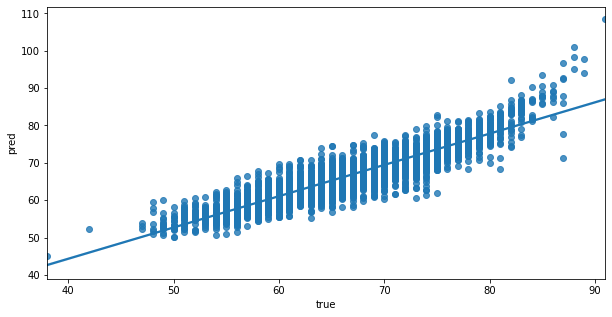

In [79]:
# Representing the result
plt.figure(figsize=(10,5))
sns.regplot(results['true'], results['pred'])